In [69]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-07-25 14:39:16.648544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 14:39:16.648811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 14:39:16.649008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 14:39:16.649237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 14:39:16.649385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3463095669618715365
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6079250432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4260793433861439655
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:2b:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [70]:
# import sys
# log_path = 'log.txt'
# sys.stdout = open(log_path, "w")

import h5py
# load dataset
h5 = h5py.File('./data/NG_07152022.hdf5', mode='r')
dataset = h5.get('phi')[...,0:2]
dataset.shape

(91, 69, 100, 100, 2)

In [71]:
# shuffle dataset
data_sz = dataset.shape[0]
indexes = np.arange(data_sz)
np.random.shuffle(indexes)
train_index = np.sort(indexes[: int(0.75 * data_sz)])
val_index = np.sort(indexes[int(0.75 * data_sz) :])

# check dataset size
print(f'Dataset shape is: {dataset.shape}')
train_dataset = np.take(dataset,train_index,axis=0)
val_dataset = np.take(dataset,val_index,axis=0)
print(f'Splitted trainning dataset shape is: {train_dataset.shape}')
print(f'Splitted trainning dataset shape is: {val_dataset.shape}')

Dataset shape is: (91, 69, 100, 100, 2)
Splitted trainning dataset shape is: (68, 69, 100, 100, 2)
Splitted trainning dataset shape is: (23, 69, 100, 100, 2)


In [72]:
from tqdm import tqdm

def reformat_phi_tips(dataset):
    sz = dataset.shape[0]*(dataset.shape[1])
    x = np.zeros([sz, 100, 100, 2])
    y = np.zeros([sz, 100, 100, 1])
    k = 0
    for i in tqdm(range(dataset.shape[0]), desc="Running ..."):
        for j in range(dataset.shape[1]):
            iter = (j+1)*500+2500
            phi = np.expand_dims(np.expand_dims(dataset[i,j,..., 0],axis=0),axis=3)
            tips = np.expand_dims(np.expand_dims(dataset[i,j,..., 1],axis=0),axis=3)
            if (iter<10500) or (iter>28500):
                iter = np.ones(phi.shape)
            else:
                iter = np.zeros(phi.shape)
            x[k,...] = np.concatenate((phi,iter),axis=3)
            y[k,...] = tips
            k+=1  

    ind = []
    for i in tqdm(range(x.shape[0]), desc="Removing empty tips ..."):
        if np.amax(y[i,...]) < 1:
            ind = np.append(ind,i)
    
    ind = ind.astype(int)
    print(ind.dtype)
    x = np.delete(x,ind,axis=0)
    y = np.delete(y,ind,axis=0)
    return x,y

x_train, y_train = reformat_phi_tips(train_dataset)
x_val, y_val = reformat_phi_tips(val_dataset)

print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Removing empty tips ...: 100%|██████████| 4692/4692 [00:00<00:00, 132140.43it/s]


int64


Removing empty tips ...: 100%|██████████| 1587/1587 [00:00<00:00, 125629.63it/s]

int64
Training Dataset Shapes: (4178, 100, 100, 2), (4178, 100, 100, 1)
Validation Dataset Shapes: (1371, 100, 100, 2), (1371, 100, 100, 1)


(4178, 100, 100, 2)
3161


Text(0.5, 1.0, 'Goal Tip')

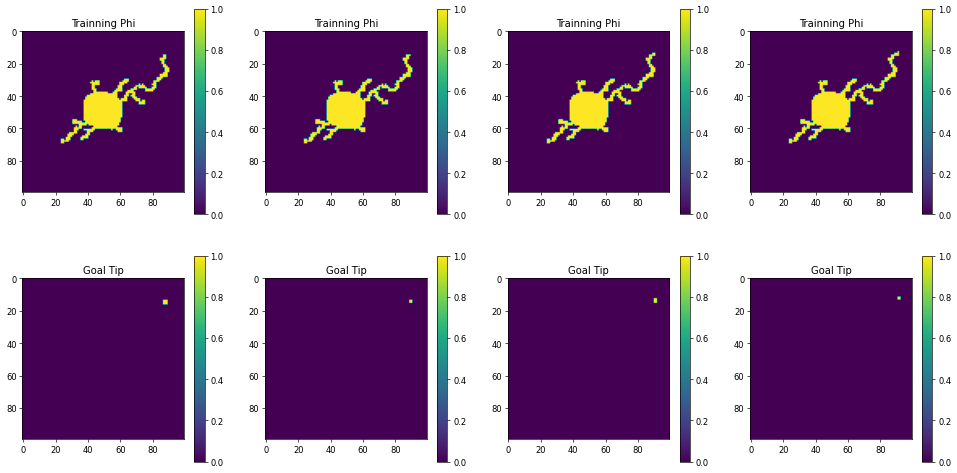

In [73]:
print(x_train.shape)
data_choice = np.random.choice(range(len(x_train)), size=1)[0]
print(data_choice)
plt.figure(figsize=(20, 10), dpi=60)
plt.subplot(2,4,1)
plt.imshow(x_train[data_choice,:,:,0])
plt.colorbar()
plt.title(f"Trainning Phi")
plt.subplot(2,4,5)
plt.imshow(y_train[data_choice,:,:,0])
plt.colorbar()
plt.title(f"Goal Tip")
plt.subplot(2,4,2)
plt.imshow(x_train[data_choice+1,:,:,0])
plt.colorbar()
plt.title(f"Trainning Phi")
plt.subplot(2,4,6)
plt.imshow(y_train[data_choice+1,:,:,0])
plt.colorbar()
plt.title(f"Goal Tip")
plt.subplot(2,4,3)
plt.imshow(x_train[data_choice+2,:,:,0])
plt.colorbar()
plt.title(f"Trainning Phi")
plt.subplot(2,4,7)
plt.imshow(y_train[data_choice+2,:,:,0])
plt.colorbar()
plt.title(f"Goal Tip")
plt.subplot(2,4,4)
plt.imshow(x_train[data_choice+3,:,:,0])
plt.colorbar()
plt.title(f"Trainning Phi")
plt.subplot(2,4,8)
plt.imshow(y_train[data_choice+3,:,:,0])
plt.colorbar()
plt.title(f"Goal Tip")

In [74]:
inp.shape

TensorShape([None, 100, 100, 1])

In [75]:
from tensorflow.keras import layers
inp = layers.Input(shape=(x_train.shape[1:]))

# Separable Convolution Encoding
x0 = layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    strides = (1, 1),
    # depth_multiplier=1,
    padding="valid",
    activation="relu",
)(inp)
x0 = layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None, 
    padding="valid"
)(x0)
x1 = layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    strides = (1, 1),
    padding="valid",
    activation="relu",
)(x0)
x1 = layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None, 
    padding="valid"
)(x1)

x2 = layers.Conv2DTranspose(
    filters=64,
    kernel_size=(6, 6),
    strides = (2, 2),
    padding="valid",
    activation="sigmoid",
)(x1)
x3 = layers.Conv2DTranspose(
    filters=1,
    kernel_size=(6, 6),
    strides = (2, 2),
    padding="valid",
    activation="sigmoid",
)(x2)

In [76]:
model = keras.models.Model(inp, x3)
model.compile(
    loss=keras.losses.binary_crossentropy, 
    optimizer=keras.optimizers.Adam(learning_rate=1e-4))
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 2)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 64)        3264      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                             
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 48, 48, 64)       2949

In [77]:
test = False

if test == True:
    model = keras.models.load_model('./saved_model/tipsCNN')
else: 
    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=15)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)
    epochs = 1000
    batch_size = 32
    with tf.device('/device:GPU:0'):
        model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping, reduce_lr],
        )
    model.save('./saved_model/tipsCNN') 

Epoch 1/1000
131/131 [==============================] - 3s 17ms/step - loss: 0.2242 - val_loss: 0.0683 - lr: 1.0000e-04
Epoch 2/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0533 - val_loss: 0.0469 - lr: 1.0000e-04
Epoch 3/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0426 - val_loss: 0.0421 - lr: 1.0000e-04
Epoch 4/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0394 - val_loss: 0.0403 - lr: 1.0000e-04
Epoch 5/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0381 - val_loss: 0.0394 - lr: 1.0000e-04
Epoch 6/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0374 - val_loss: 0.0389 - lr: 1.0000e-04
Epoch 7/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0368 - val_loss: 0.0384 - lr: 1.0000e-04
Epoch 8/1000
131/131 [==============================] - 2s 14ms/step - loss: 0.0364 - val_loss: 0.0380 - lr: 1.0000e-04
Epoch 9/1000
131/131 [==================

INFO:tensorflow:Assets written to: ./saved_model/tipsCNN/assets


INFO:tensorflow:Assets written to: ./saved_model/tipsCNN/assets


Plotting and Saving figures ...:   0%|          | 0/64 [00:00<?, ?it/s]

Random case: 5


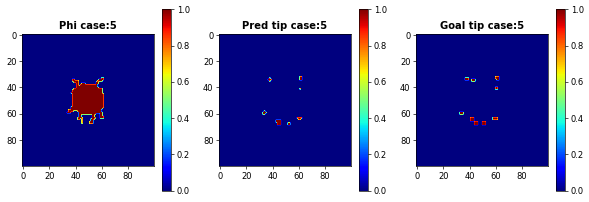

Plotting and Saving figures ...:   2%|▏         | 1/64 [00:00<00:19,  3.24it/s]

Random case: 12


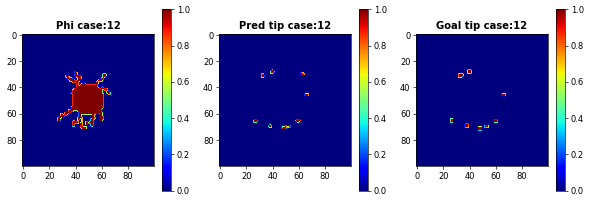

Plotting and Saving figures ...:   3%|▎         | 2/64 [00:00<00:16,  3.69it/s]

Random case: 4


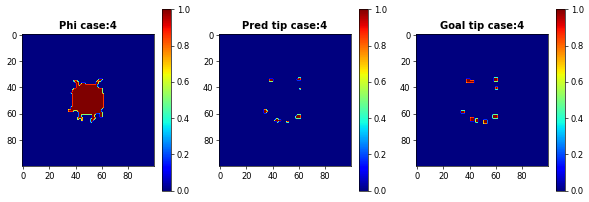

Plotting and Saving figures ...:   5%|▍         | 3/64 [00:00<00:15,  3.84it/s]

Random case: 8


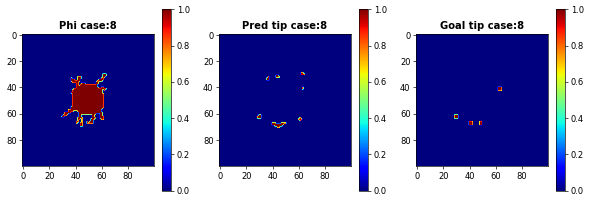

Plotting and Saving figures ...:   6%|▋         | 4/64 [00:01<00:15,  3.96it/s]

Random case: 13


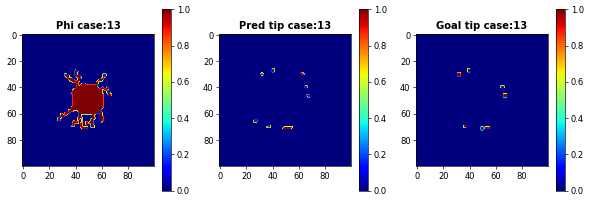

Plotting and Saving figures ...:   8%|▊         | 5/64 [00:01<00:14,  4.04it/s]

Random case: 7


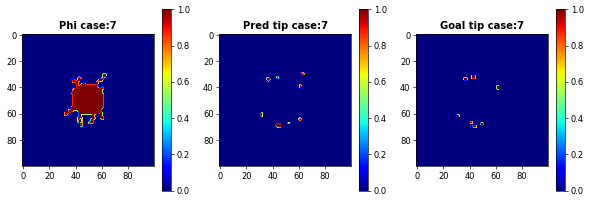

Plotting and Saving figures ...:   9%|▉         | 6/64 [00:01<00:14,  4.08it/s]

Random case: 13


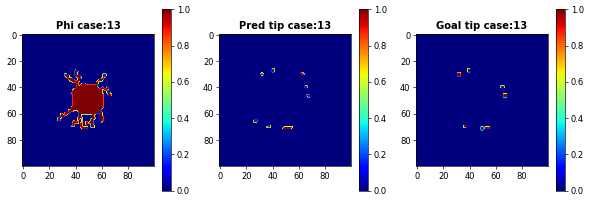

Plotting and Saving figures ...:  11%|█         | 7/64 [00:01<00:13,  4.10it/s]

Random case: 9


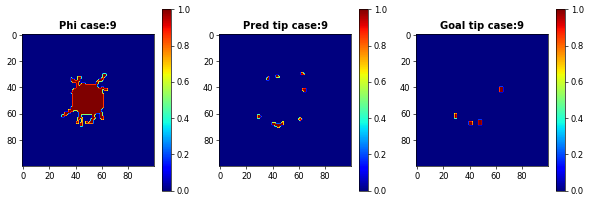

Plotting and Saving figures ...:  12%|█▎        | 8/64 [00:02<00:13,  4.09it/s]

Random case: 21


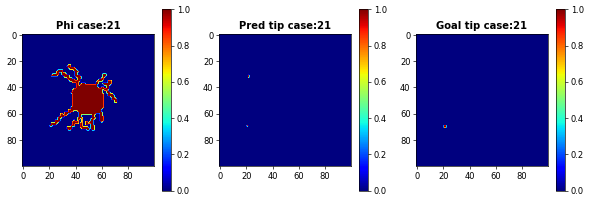

Plotting and Saving figures ...:  14%|█▍        | 9/64 [00:02<00:13,  4.09it/s]

Random case: 17


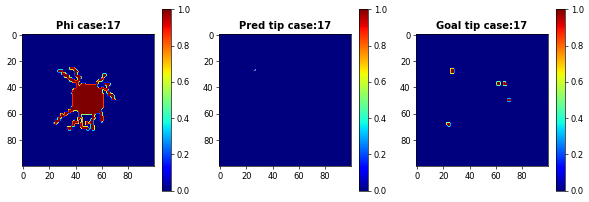

Plotting and Saving figures ...:  16%|█▌        | 10/64 [00:02<00:13,  4.09it/s]

Random case: 11


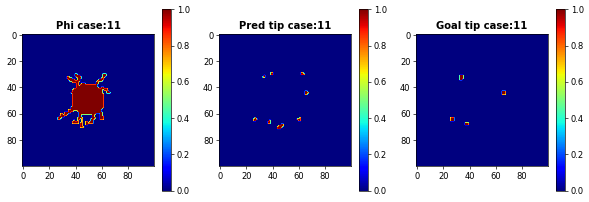

Plotting and Saving figures ...:  17%|█▋        | 11/64 [00:03<00:19,  2.67it/s]

Random case: 10


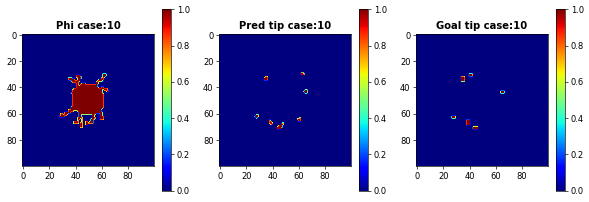

Plotting and Saving figures ...:  19%|█▉        | 12/64 [00:03<00:17,  2.98it/s]

Random case: 10


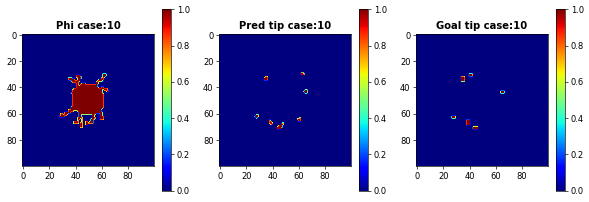

Plotting and Saving figures ...:  20%|██        | 13/64 [00:03<00:15,  3.23it/s]

Random case: 10


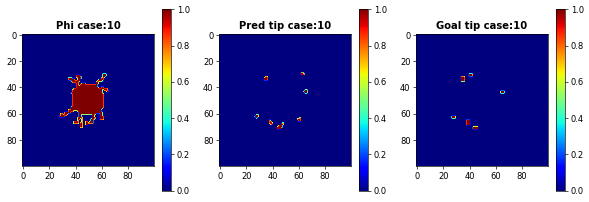

Plotting and Saving figures ...:  22%|██▏       | 14/64 [00:03<00:14,  3.40it/s]

Random case: 22


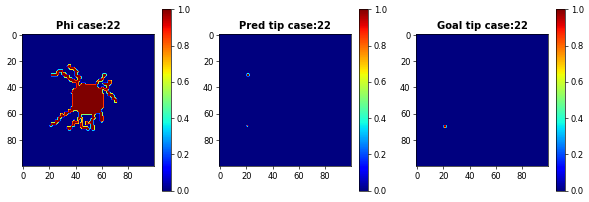

Plotting and Saving figures ...:  23%|██▎       | 15/64 [00:04<00:13,  3.57it/s]

Random case: 13


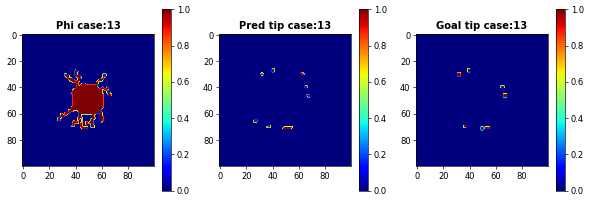

Plotting and Saving figures ...:  25%|██▌       | 16/64 [00:04<00:12,  3.69it/s]

Random case: 10


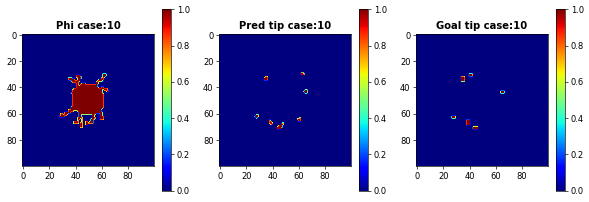

Plotting and Saving figures ...:  27%|██▋       | 17/64 [00:04<00:12,  3.79it/s]

Random case: 22


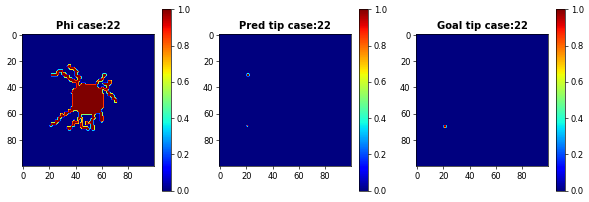

Plotting and Saving figures ...:  28%|██▊       | 18/64 [00:04<00:11,  3.85it/s]

Random case: 17


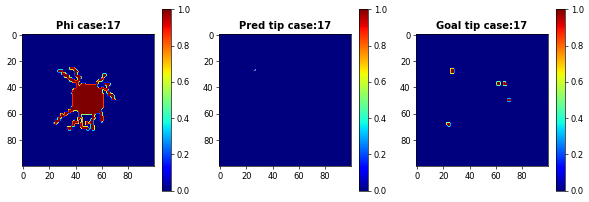

Plotting and Saving figures ...:  30%|██▉       | 19/64 [00:05<00:11,  3.90it/s]

Random case: 11


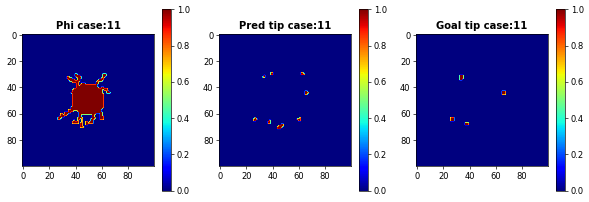

Plotting and Saving figures ...:  31%|███▏      | 20/64 [00:05<00:11,  3.94it/s]

Random case: 10


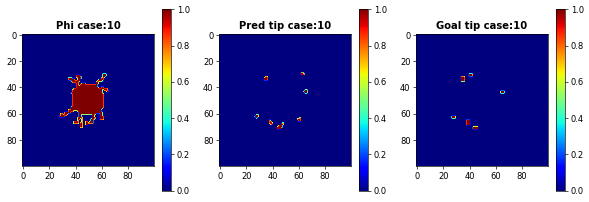

Plotting and Saving figures ...:  33%|███▎      | 21/64 [00:05<00:10,  3.96it/s]

Random case: 13


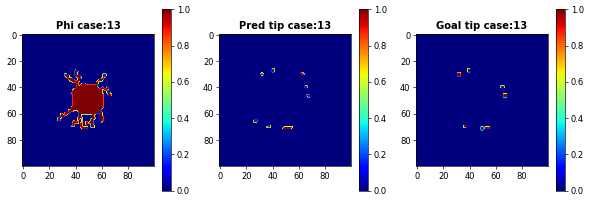

Plotting and Saving figures ...:  34%|███▍      | 22/64 [00:05<00:10,  3.98it/s]

Random case: 16


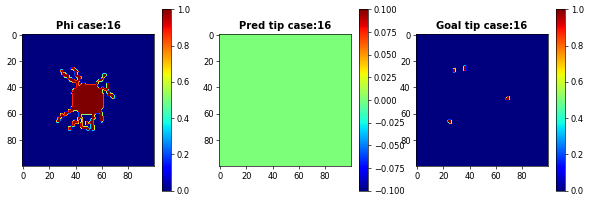

Plotting and Saving figures ...:  36%|███▌      | 23/64 [00:06<00:10,  3.94it/s]

Random case: 22


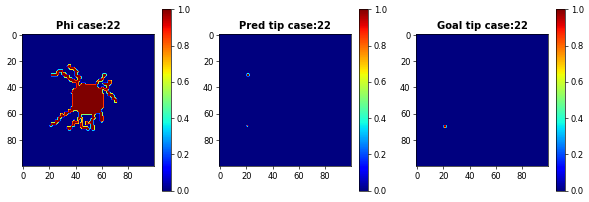

Plotting and Saving figures ...:  38%|███▊      | 24/64 [00:06<00:10,  3.99it/s]

Random case: 19


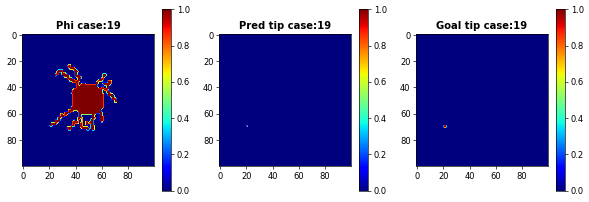

Plotting and Saving figures ...:  39%|███▉      | 25/64 [00:06<00:09,  4.03it/s]

Random case: 16


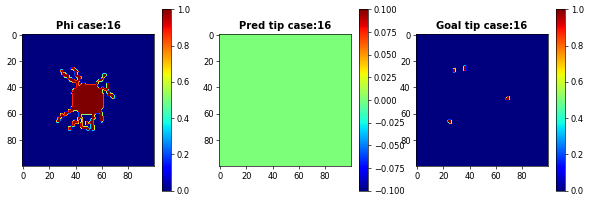

Plotting and Saving figures ...:  41%|████      | 26/64 [00:06<00:09,  3.96it/s]

Random case: 13


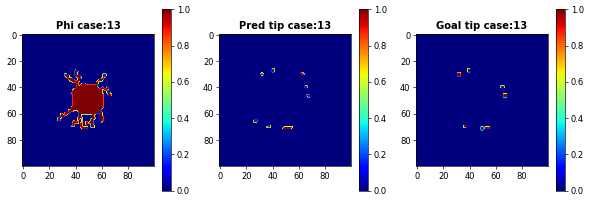

Plotting and Saving figures ...:  42%|████▏     | 27/64 [00:07<00:09,  4.00it/s]

Random case: 20


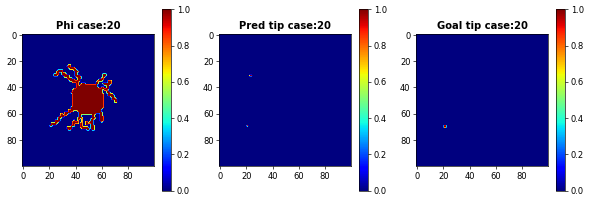

Plotting and Saving figures ...:  44%|████▍     | 28/64 [00:07<00:08,  4.03it/s]

Random case: 6


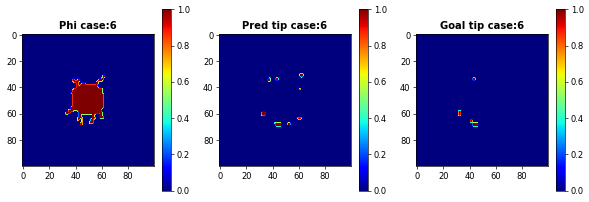

Plotting and Saving figures ...:  45%|████▌     | 29/64 [00:07<00:08,  4.05it/s]

Random case: 11


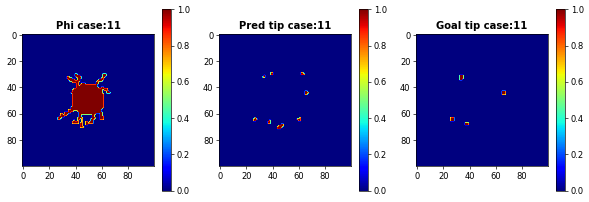

Plotting and Saving figures ...:  47%|████▋     | 30/64 [00:07<00:08,  4.02it/s]

Random case: 1


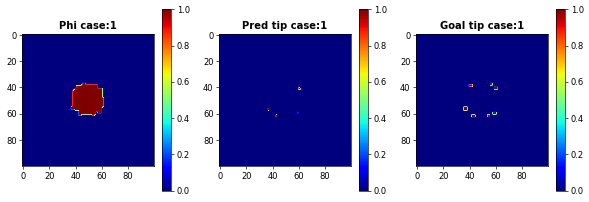

Plotting and Saving figures ...:  48%|████▊     | 31/64 [00:08<00:12,  2.64it/s]

Random case: 3


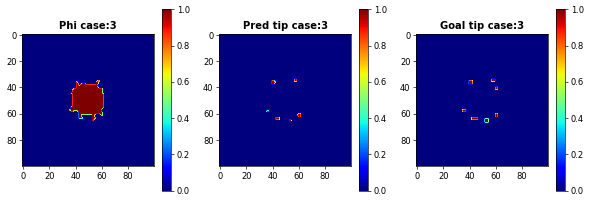

Plotting and Saving figures ...:  50%|█████     | 32/64 [00:08<00:10,  2.93it/s]

Random case: 12


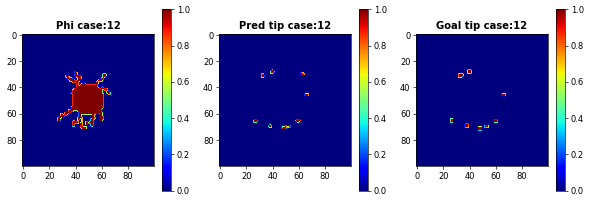

Plotting and Saving figures ...:  52%|█████▏    | 33/64 [00:09<00:09,  3.17it/s]

Random case: 15


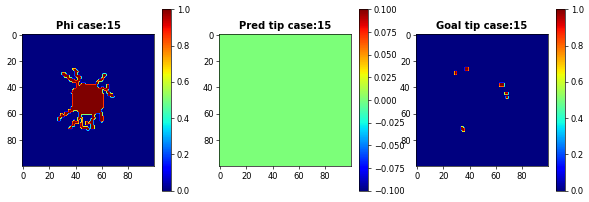

Plotting and Saving figures ...:  53%|█████▎    | 34/64 [00:09<00:08,  3.34it/s]

Random case: 9


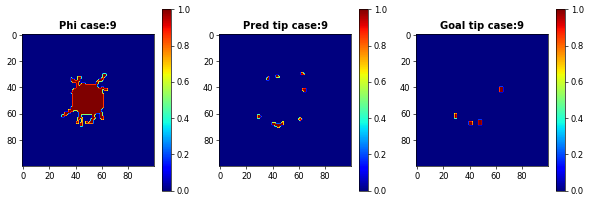

Plotting and Saving figures ...:  55%|█████▍    | 35/64 [00:09<00:08,  3.51it/s]

Random case: 4


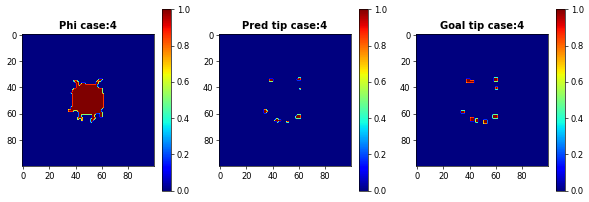

Plotting and Saving figures ...:  56%|█████▋    | 36/64 [00:09<00:07,  3.64it/s]

Random case: 1


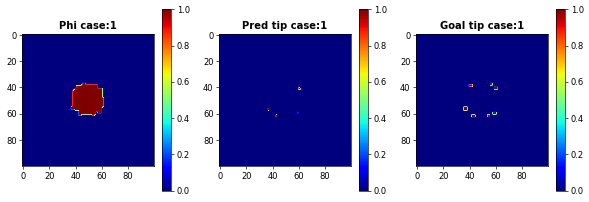

Plotting and Saving figures ...:  58%|█████▊    | 37/64 [00:10<00:07,  3.74it/s]

Random case: 6


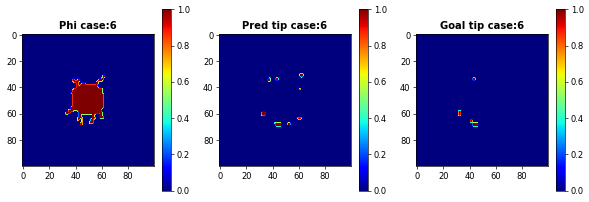

Plotting and Saving figures ...:  59%|█████▉    | 38/64 [00:10<00:06,  3.82it/s]

Random case: 12


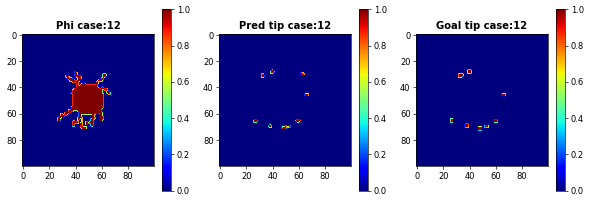

Plotting and Saving figures ...:  61%|██████    | 39/64 [00:10<00:06,  3.87it/s]

Random case: 7


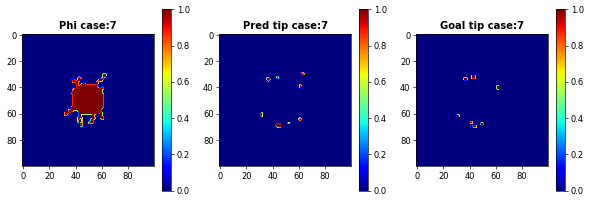

Plotting and Saving figures ...:  62%|██████▎   | 40/64 [00:10<00:06,  3.92it/s]

Random case: 20


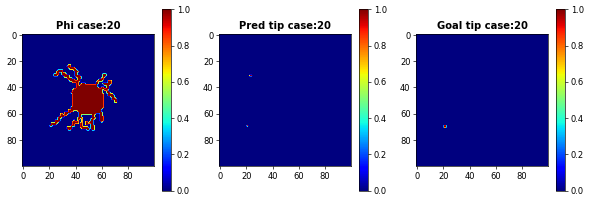

Plotting and Saving figures ...:  64%|██████▍   | 41/64 [00:11<00:05,  3.95it/s]

Random case: 17


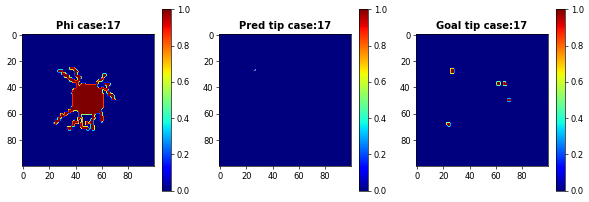

Plotting and Saving figures ...:  66%|██████▌   | 42/64 [00:11<00:05,  3.97it/s]

Random case: 21


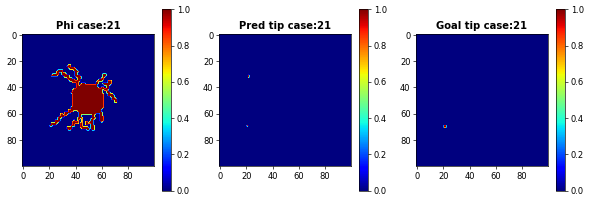

Plotting and Saving figures ...:  67%|██████▋   | 43/64 [00:11<00:05,  3.99it/s]

Random case: 22


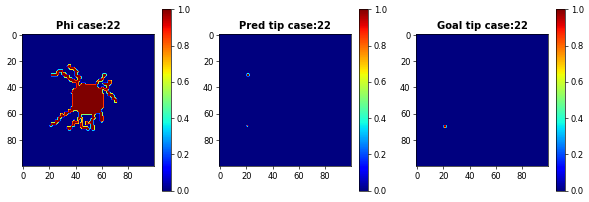

Plotting and Saving figures ...:  69%|██████▉   | 44/64 [00:11<00:04,  4.01it/s]

Random case: 12


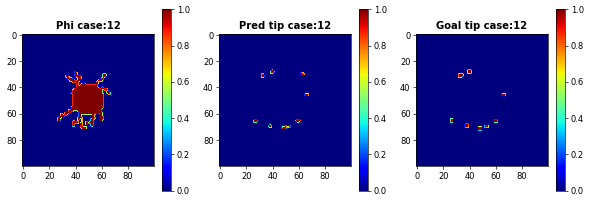

Plotting and Saving figures ...:  70%|███████   | 45/64 [00:12<00:04,  4.02it/s]

Random case: 22


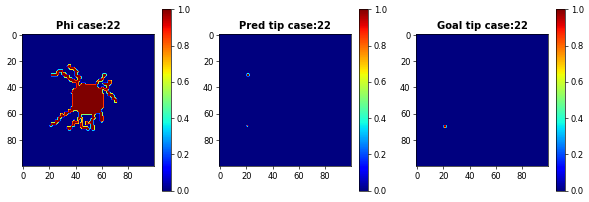

Plotting and Saving figures ...:  72%|███████▏  | 46/64 [00:12<00:04,  4.01it/s]

Random case: 1


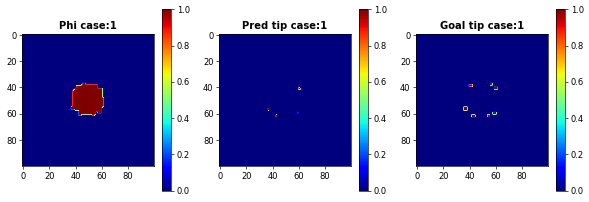

Plotting and Saving figures ...:  73%|███████▎  | 47/64 [00:12<00:04,  4.02it/s]

Random case: 1


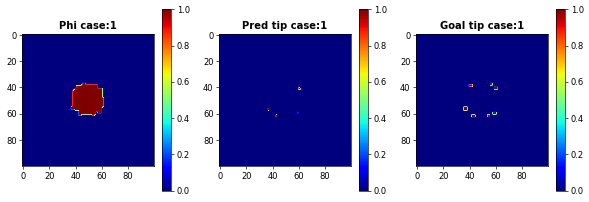

Plotting and Saving figures ...:  75%|███████▌  | 48/64 [00:12<00:03,  4.03it/s]

Random case: 21


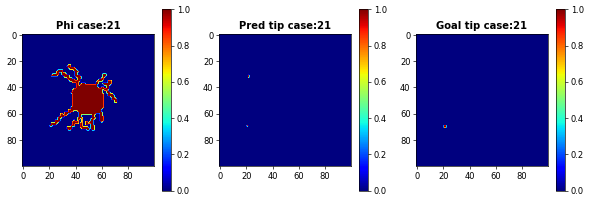

Plotting and Saving figures ...:  77%|███████▋  | 49/64 [00:13<00:03,  4.03it/s]

Random case: 9


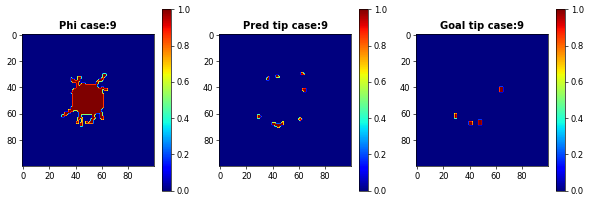

Plotting and Saving figures ...:  78%|███████▊  | 50/64 [00:13<00:03,  4.03it/s]

Random case: 13


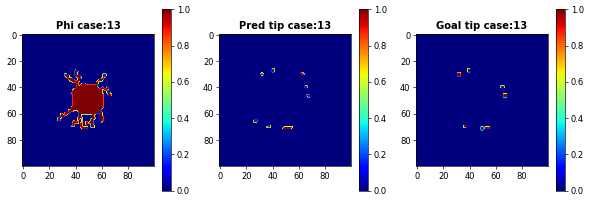

Plotting and Saving figures ...:  80%|███████▉  | 51/64 [00:14<00:04,  2.64it/s]

Random case: 2


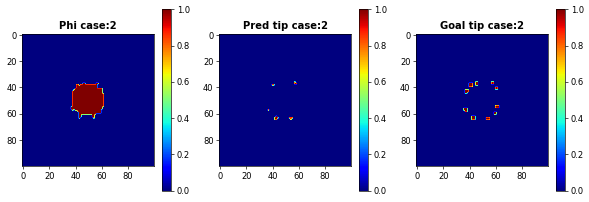

Plotting and Saving figures ...:  81%|████████▏ | 52/64 [00:14<00:04,  2.95it/s]

Random case: 19


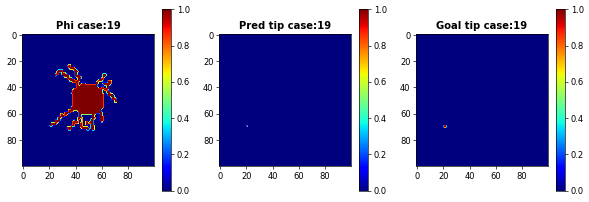

Plotting and Saving figures ...:  83%|████████▎ | 53/64 [00:14<00:03,  3.20it/s]

Random case: 20


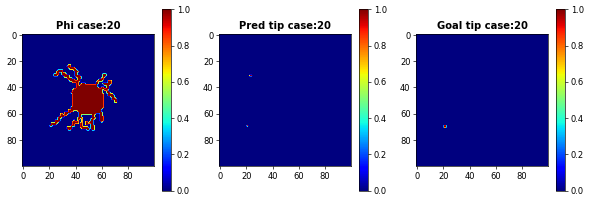

Plotting and Saving figures ...:  84%|████████▍ | 54/64 [00:14<00:02,  3.39it/s]

Random case: 18


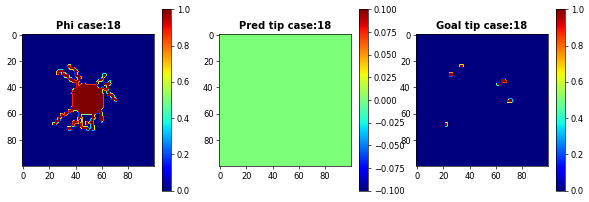

Plotting and Saving figures ...:  86%|████████▌ | 55/64 [00:15<00:02,  3.51it/s]

Random case: 8


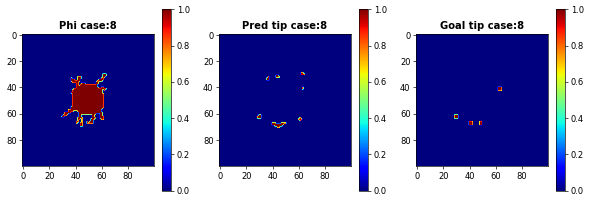

Plotting and Saving figures ...:  88%|████████▊ | 56/64 [00:15<00:02,  3.65it/s]

Random case: 2


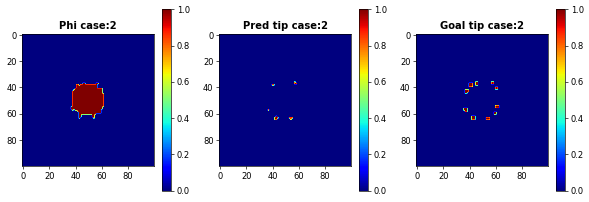

Plotting and Saving figures ...:  89%|████████▉ | 57/64 [00:15<00:01,  3.75it/s]

Random case: 1


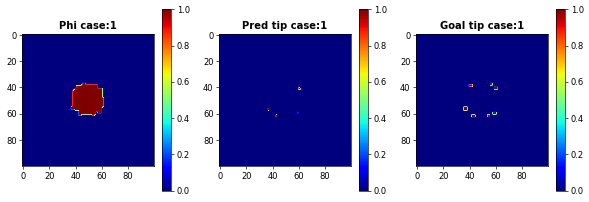

Plotting and Saving figures ...:  91%|█████████ | 58/64 [00:15<00:01,  3.84it/s]

Random case: 4


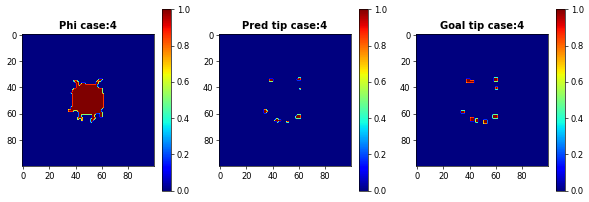

Plotting and Saving figures ...:  92%|█████████▏| 59/64 [00:16<00:01,  3.92it/s]

Random case: 6


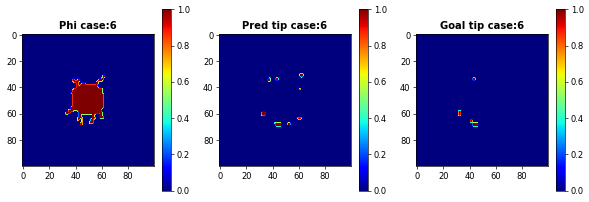

Plotting and Saving figures ...:  94%|█████████▍| 60/64 [00:16<00:01,  3.96it/s]

Random case: 17


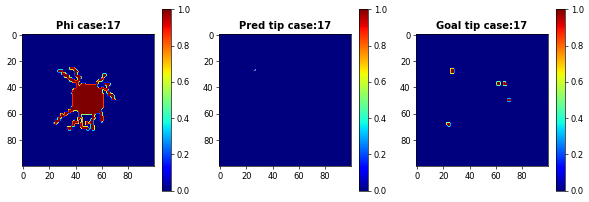

Plotting and Saving figures ...:  95%|█████████▌| 61/64 [00:16<00:00,  3.99it/s]

Random case: 3


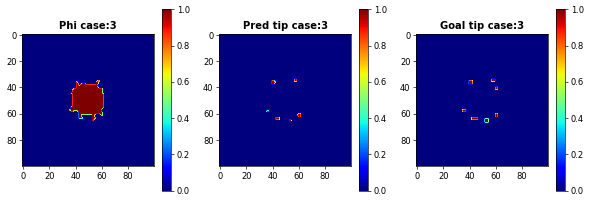

Plotting and Saving figures ...:  97%|█████████▋| 62/64 [00:16<00:00,  4.01it/s]

Random case: 6


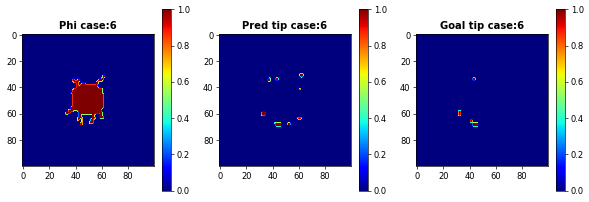

Plotting and Saving figures ...:  98%|█████████▊| 63/64 [00:17<00:00,  4.01it/s]

Random case: 3


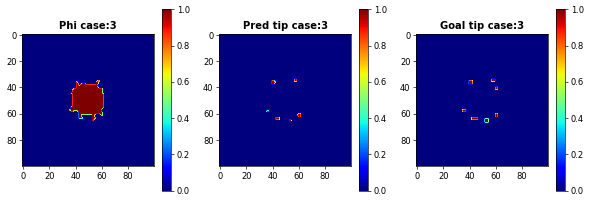

Plotting and Saving figures ...: 100%|██████████| 64/64 [00:17<00:00,  3.71it/s]


In [78]:
for i in tqdm(range(64), desc="Plotting and Saving figures ..."):
    rand_case = np.random.randint((len(val_dataset)))
    print(f"Random case: {rand_case}")

    x_in = np.expand_dims(x_val[rand_case,...],axis=0)
    y_goal = np.expand_dims(y_val[rand_case,...],axis=0)
    
    # prediction
    new_prediction = model.predict(x_in,verbose="0")
    tips = np.round(new_prediction[0,:,:,0])

    # plot prediction
    plt.figure(figsize=(12, 4), dpi=60)
    plt.gcf().set_facecolor("white")
    plt.subplot(1,3,1)
    plt.imshow(x_in[0,:,:,0], cmap='jet')
    plt.colorbar()
    plt.title(f"Phi case:{rand_case}", fontweight='bold')
    plt.subplot(1,3,2)
    plt.imshow(tips, cmap='jet')
    plt.colorbar()
    plt.title(f"Pred tip case:{rand_case}", fontweight='bold')
    plt.subplot(1,3,3)
    plt.imshow(y_goal[0,:,:,0], cmap='jet')
    plt.colorbar()
    plt.title(f"Goal tip case:{rand_case}", fontweight='bold')

    plt.show()